In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter1d


(-3, 3)

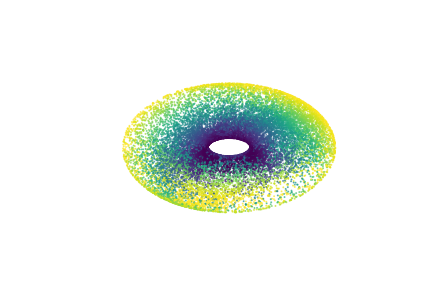

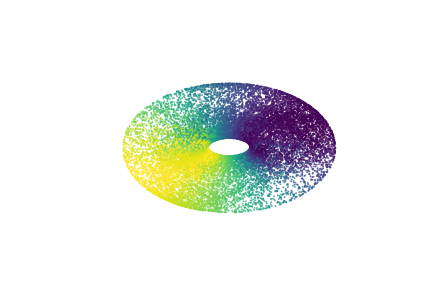

In [5]:

#### plot torus ###
numpoints = 10000
rat_name = 'R'
mod_name = '2'
sess_name = 'OF'
day_name = 'day2'
file_name =  rat_name + '_' + mod_name + '_' + sess_name 
if len(day_name)>0:
    file_name += '_' + day_name  

f = np.load('Toroidal_topology_grid_cell_data/Results/' + file_name  + '_decoding.npz',
    allow_pickle = True)
c1 = f['coordsbox'][:,0]
c2 = f['coordsbox'][:,1]
times = f['times_box']
f.close()    

sig = 10
c1 = np.arctan2(gaussian_filter1d(np.sin(c1),sig), gaussian_filter1d(np.cos(c1),sig))
c2 = np.arctan2(gaussian_filter1d(np.sin(c2),sig), gaussian_filter1d(np.cos(c2),sig))

numpoints = len(c1)
r1, r2 = 1.5, 1
x = np.zeros(numpoints)
y = np.zeros(numpoints)
z = np.zeros(numpoints)
for i in range(numpoints):
        x[i] = (r1 + r2*np.cos(c1[i]))*np.cos(c2[i]) 
        y[i] = (r1 + r2*np.cos(c1[i]))*np.sin(c2[i])  
        z[i] =  r2*np.sin(c1[i])

fig = plt.figure()
times = np.arange(0,len(c1), 5)
ax = Axes3D(fig)#c = c12all_orig0[times][ex],
ax.scatter(x[times],y[times],z[times], c = np.cos((c1[times]-0.3)%(2*np.pi)), cmap = 'viridis', alpha = 0.6, s = 1)
ax.axis('off')
ax.view_init(60, 80)
ax.set_zlim(-3,3)
#plt.savefig('torus_c1.pdf')

fig = plt.figure()
times = np.arange(0,len(c1), 5)
ax = Axes3D(fig)#c = c12all_orig0[times][ex],
ax.scatter(x[times],y[times],z[times], c = np.cos((c2[times]-0.3)%(2*np.pi)), cmap = 'viridis', alpha = 0.6, s = 1)
ax.axis('off')
ax.view_init(60, 80)
ax.set_zlim(-3,3)


(0.0, 8.168140899333462, 0.0, 8.168140899333462)

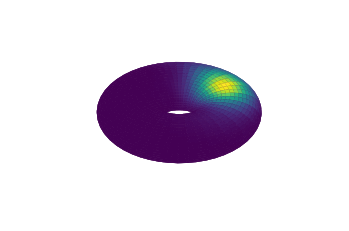

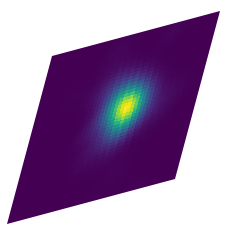

In [12]:
############ plot torus bump ##############

rat_name = 'Q'
mod_name = '1'
sess_name = 'OF'
day_name = ''
file_name =  rat_name + '_' + mod_name + '_' + sess_name 
if len(day_name)>0:
    file_name += '_' + day_name  


f = np.load('Toroidal_topology_grid_cell_data/Results/' + file_name  + '_decoding.npz',
    allow_pickle = True)
coords = f['coordsbox']
times = f['times_box']
f.close()    

spk = get_spikes(rat_name, mod_name, day_name, sess_name, bType = 'pure', bSmooth = False, bSpeed = True)[0]

numangsint = 51
m, x_edge, y_edge, circ = binned_statistic_2d(coords[:,0],coords[:,1], 
        spk[times,8], statistic='mean', bins=np.linspace(0, 2*np.pi,numangsint-1), 
                                              range=None, expand_binnumbers=True)
m = smooth_tuning_map(m, numangsint-1, 2.75, bClose = True)
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x_edge, y_edge)
X +=np.pi/5
X = X%(2*np.pi)
r1 = 1.5
r2 = 1
x = (r1 + r2*np.cos(X))*np.cos(Y) 
y = (r1 + r2*np.cos(X))*np.sin(Y)  
z =  r2*np.sin(X)

ax.plot_surface(x,y,z, facecolors=cm.viridis(np.power(m/np.max(m),1)),alpha = 1,
                       linewidth=0.1, antialiased=True,
                      rstride = 1, cstride =1, shade = False, vmin = 0,zorder = -2)
ax.set_zlim(-2,2)
ax.view_init(-125,135)
#ax.view_init(45,135)

plt.axis('off')
plt.viridis()

r_box = transforms.Affine2D().skew_deg(15,15)
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.imshow(np.rot90(np.roll(np.roll(m/np.max(m),40,1),0,0),1), origin = 'lower', extent = [0,2*np.pi,0, 2*np.pi], vmin = 0, vmax = 1)
ax.set_xticks([])
ax.set_yticks([])

for x in ax.images + ax.lines + ax.collections:
    trans = x.get_transform()
    x.set_transform(r_box+trans) 
    if isinstance(x, PathCollection):
        transoff = x.get_offset_transform()
        x._transOffset = r_box+transoff     
ax.set_xlim(0, 2*np.pi + 3*np.pi/5)
ax.set_ylim(0, 2*np.pi + 3*np.pi/5)
ax.set_aspect('equal', 'box') 
ax.axis('off')


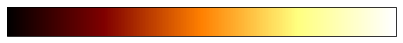

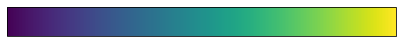

In [13]:
############ plot colorbar ##############
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
plt.axis('off')
col_map = plt.get_cmap('afmhot')

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal',
                               cmap=col_map)

fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
plt.axis('off')
col_map = plt.get_cmap('viridis')

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal',
                               cmap=col_map)
